In [5]:

import numpy as np
import pandas as pd

In [6]:
data=pd.read_csv('/content/WorldCupMatches.csv')

In [7]:
data.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [8]:
data.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,852.000000,852.000000,852.000000,850.000000,852.000000,852.000000,8.520000e+02,8.520000e+02
mean,1985.089202,1.811033,1.022300,45164.800000,0.708920,0.428404,1.066177e+07,6.134687e+07
std,22.448825,1.610255,1.087573,23485.249247,0.937414,0.691252,2.729613e+07,1.110572e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188750e+03
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.191000e+03
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

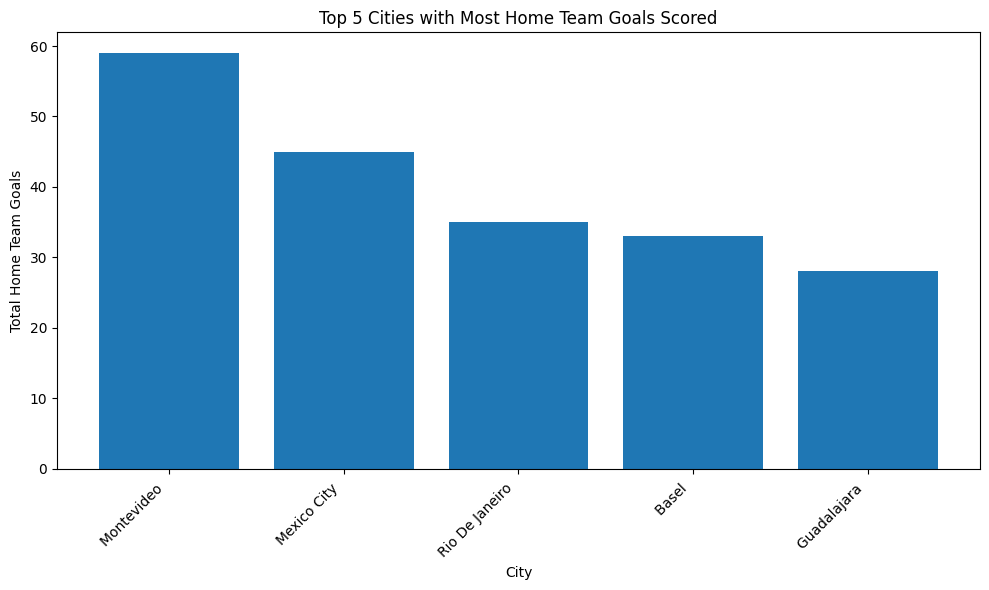

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data by city and sum home team goals
city_goals = data.groupby('City')['Home Team Goals'].sum().reset_index()

# Sort by goals and get the top 5
top_5_cities = city_goals.sort_values(by=['Home Team Goals'], ascending=False).head(5)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_5_cities['City'], top_5_cities['Home Team Goals'])
plt.xlabel('City')
plt.ylabel('Total Home Team Goals')
plt.title('Top 5 Cities with Most Home Team Goals Scored')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [12]:
import pandas as pd

# Specify the format explicitly
data['Datetime'] = pd.to_datetime(data['Datetime'], format='%d %B %Y - %H:%M ', errors='coerce')

# Extract year, month, and date
data['Year'] = data['Datetime'].dt.year
data['Month'] = data['Datetime'].dt.month
data['Day'] = data['Datetime'].dt.day

In [13]:
print(data[['Year', 'Month', 'Day']].head())

   Year  Month  Day
0   NaN    NaN  NaN
1   NaN    NaN  NaN
2   NaN    NaN  NaN
3   NaN    NaN  NaN
4   NaN    NaN  NaN


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Load the dataset
data = pd.read_csv('/content/WorldCupMatches.csv')

# Preprocess the data
# ... (Code from previous responses to handle 'Datetime' column and extract Year, Month, Day) ...

# Create a target variable for the home team's outcome
# 1: Win, 0: Draw, -1: Loss
data['HomeTeamOutcome'] = np.where(data['Home Team Goals'] > data['Away Team Goals'], 1,
                                 np.where(data['Home Team Goals'] == data['Away Team Goals'], 0, -1))

# Select features and target variable
features = ['Year', 'Home Team Goals', 'Away Team Goals']
target = 'HomeTeamOutcome'
X = data[features]
y = data[target]

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Replace 'mean' with other strategies if needed
X = imputer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy}')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.9431693989071038
Random Forest Accuracy: 1.0


Data Shape: (4572, 20)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null   

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,852.000000,852.000000,852.000000,850.000000,852.000000,852.000000,8.520000e+02,8.520000e+02
mean,1985.089202,1.811033,1.022300,45164.800000,0.708920,0.428404,1.066177e+07,6.134687e+07
std,22.448825,1.610255,1.087573,23485.249247,0.937414,0.691252,2.729613e+07,1.110572e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188750e+03
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.191000e+03
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


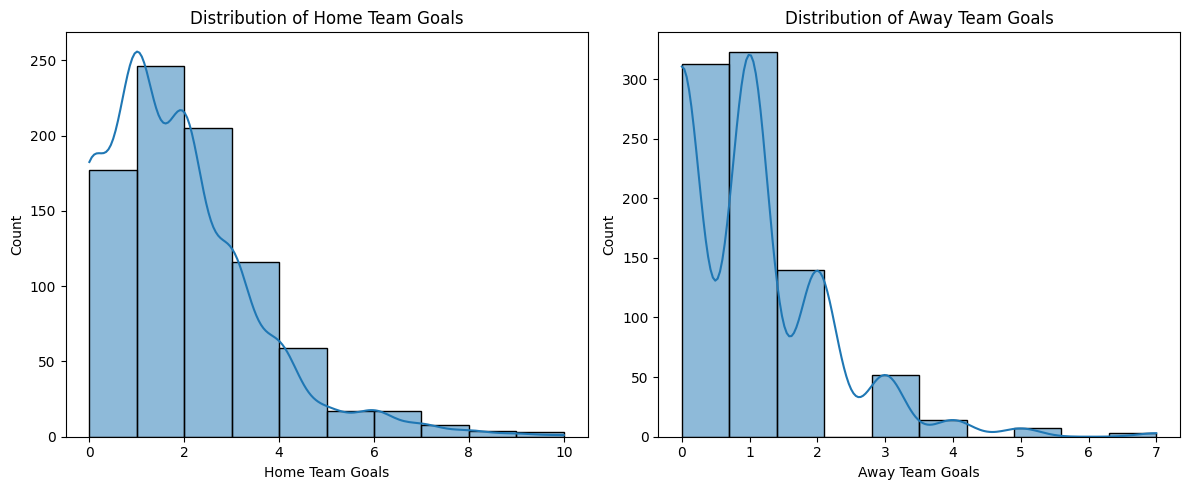

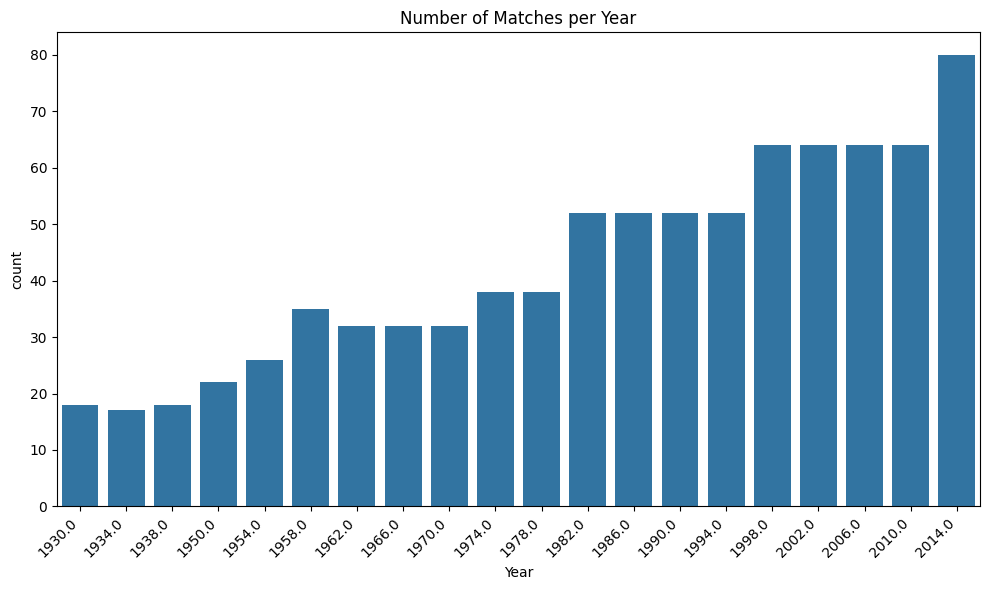

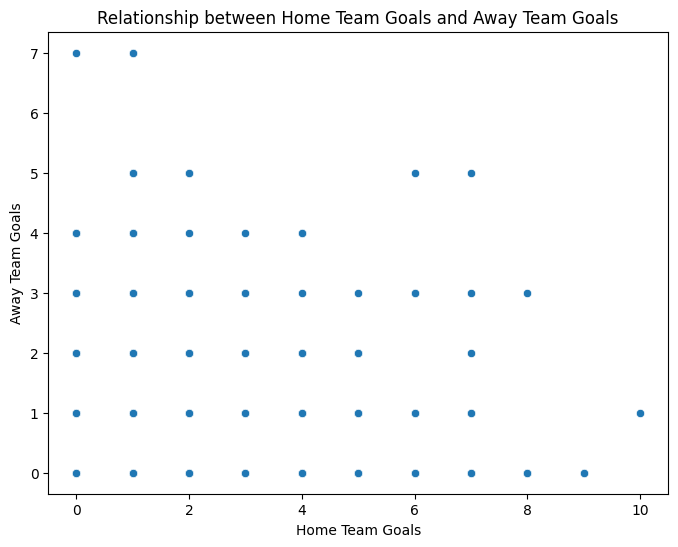

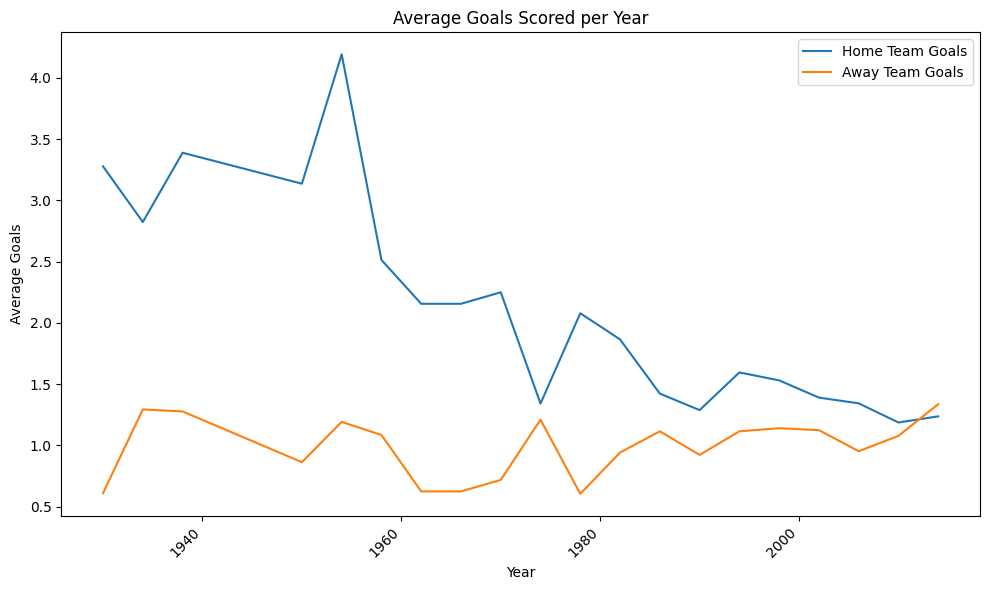

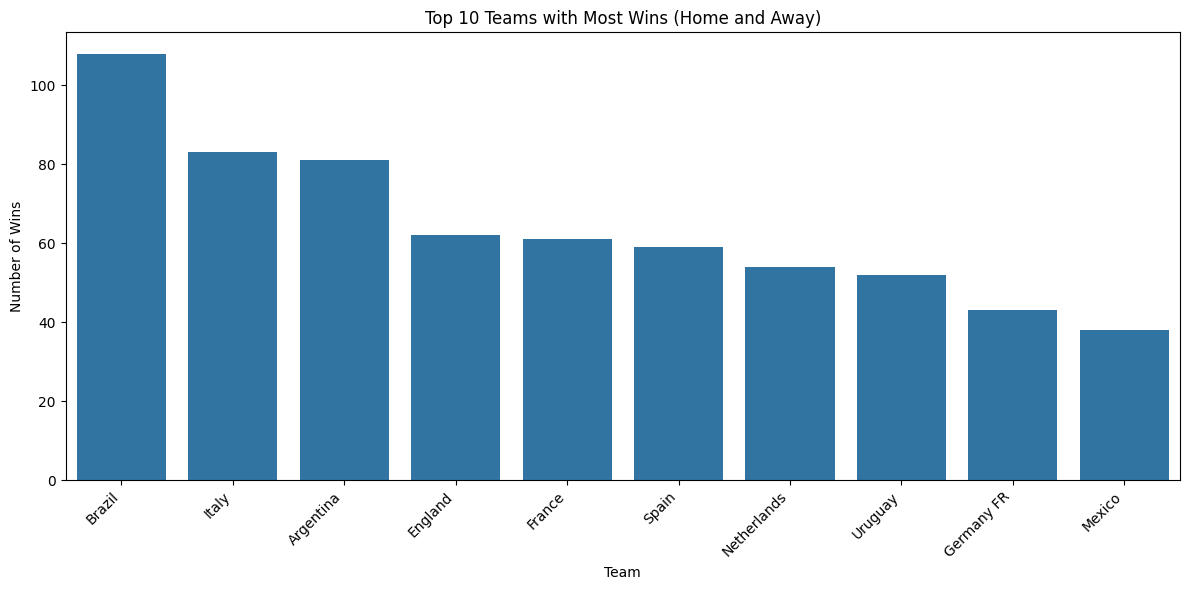

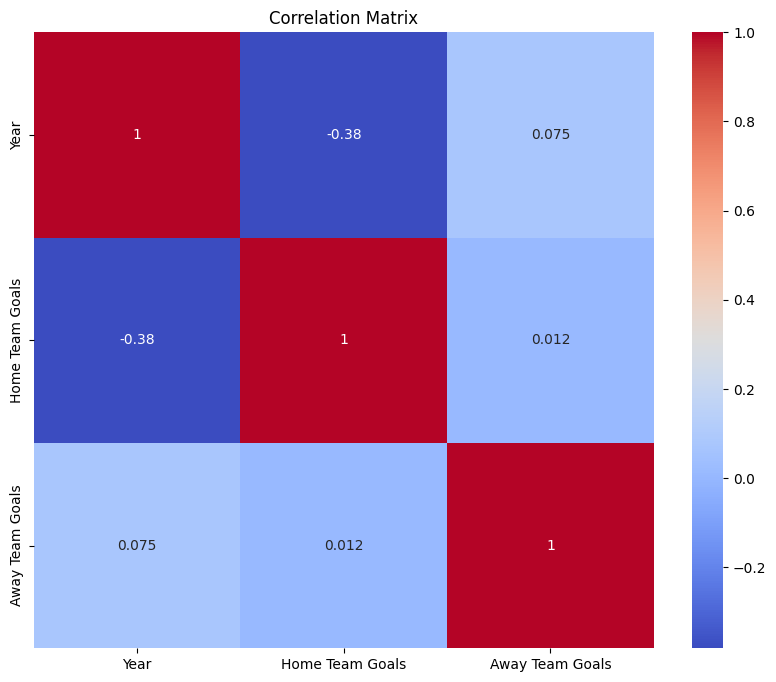

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/WorldCupMatches.csv')

# Basic Data Exploration
print("Data Shape:", data.shape)
print("\nData Info:")
data.info()
print("\nData Description:")
display(data.describe())  # Use display for better formatting in Jupyter

# Handling Missing Values (if any)
# You can use techniques like imputation or dropping rows with missing values

# Data Cleaning and Feature Engineering
# (Code to handle 'Datetime' column and extract Year, Month, Day from previous responses)

# Univariate Analysis

# Distribution of Home Team Goals and Away Team Goals
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['Home Team Goals'], bins=10, kde=True)
plt.title('Distribution of Home Team Goals')
plt.subplot(1, 2, 2)
sns.histplot(data['Away Team Goals'], bins=10, kde=True)
plt.title('Distribution of Away Team Goals')
plt.tight_layout()
plt.show()

# Count of Matches per Year
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=data)
plt.title('Number of Matches per Year')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Bivariate Analysis

# Relationship between Home Team Goals and Away Team Goals
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Home Team Goals', y='Away Team Goals', data=data)
plt.title('Relationship between Home Team Goals and Away Team Goals')
plt.show()

# Average Goals Scored per Year
avg_goals_per_year = data.groupby('Year')[['Home Team Goals', 'Away Team Goals']].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(avg_goals_per_year['Year'], avg_goals_per_year['Home Team Goals'], label='Home Team Goals')
plt.plot(avg_goals_per_year['Year'], avg_goals_per_year['Away Team Goals'], label='Away Team Goals')
plt.title('Average Goals Scored per Year')
plt.xlabel('Year')
plt.ylabel('Average Goals')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Top 10 Teams with Most Wins (Home and Away)
home_wins = data['Home Team Name'].value_counts().head(10)
away_wins = data['Away Team Name'].value_counts().head(10)
total_wins = home_wins.add(away_wins, fill_value=0).sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=total_wins.index, y=total_wins.values)
plt.title('Top 10 Teams with Most Wins (Home and Away)')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data[['Year', 'Home Team Goals', 'Away Team Goals']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# ... (Add more EDA steps as needed) ...